This code is for EN5423 class at GIST, Republic of Korea, and created by Dr. Hyunglok Kim.  
**Contact information**: hyunglokkim@gist.ac.kr  
**License**: This work is licensed for non-commercial use only.  
**Restrictions**: Do not use this material without permission for teaching or developing other classes.

In [8]:
import platform
import sys
import os
import importlib

import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

if platform.system() == 'Darwin':
    base_FP = '/Users/hyunglokkim/Insync/hkim@geol.sc.edu/Google_Drive/'
else:
    base_FP = '/data'
sys.path.append(base_FP + '/python_modules')

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Example of how to call the function
FP = base_FP + '/GIST/0.Lectures/2024_Spring/EN5423/datasets/week02'
input_file = 'usgs-streamflow-nldas_hourly.nc'

# Open the NetCDF file
dataset = nc.Dataset(os.path.join(FP, input_file), mode='r')

# Print the variables
print("Variables in the NetCDF file:")
for var in dataset.variables:
    print(var)

Variables in the NetCDF file:
date
convective_fraction
longwave_radiation
potential_energy
potential_evaporation
pressure
shortwave_radiation
specific_humidity
temperature
total_precipitation
wind_u
wind_v
qobs_mm_per_hour
qobs_count
qualifiers
utcoffset_hours
rel_deviation_from_camels
qobs_CAMELS_mm_per_hour
basin


In [4]:
# Extract streamflow, precipitation, and time data
streamflow_data = dataset.variables['qobs_mm_per_hour'][0, :]
precipitation_data = dataset.variables['total_precipitation'][0, :]
times = nc.num2date(dataset.variables['date'][:], units="hours since 2000-01-01 00:00:00", calendar="proleptic_gregorian")

# Since direct conversion of cftime to pandas datetime might not work, let's do a workaround
# Convert cftime objects to strings and then to pandas datetime
time_strings = [str(time) for time in times]  # Convert cftime objects to strings
time_datetimes = pd.to_datetime(time_strings)  # Convert strings to pandas datetime objects

# Convert to pandas DataFrame
df = pd.DataFrame({'Streamflow': streamflow_data, 'Precipitation': precipitation_data.flatten()}, index=time_datetimes)

In [5]:
# Resample to monthly values using the mean for streamflow and sum for precipitation
monthly_df = df.resample('M').agg({'Streamflow': 'mean', 'Precipitation': 'sum'})

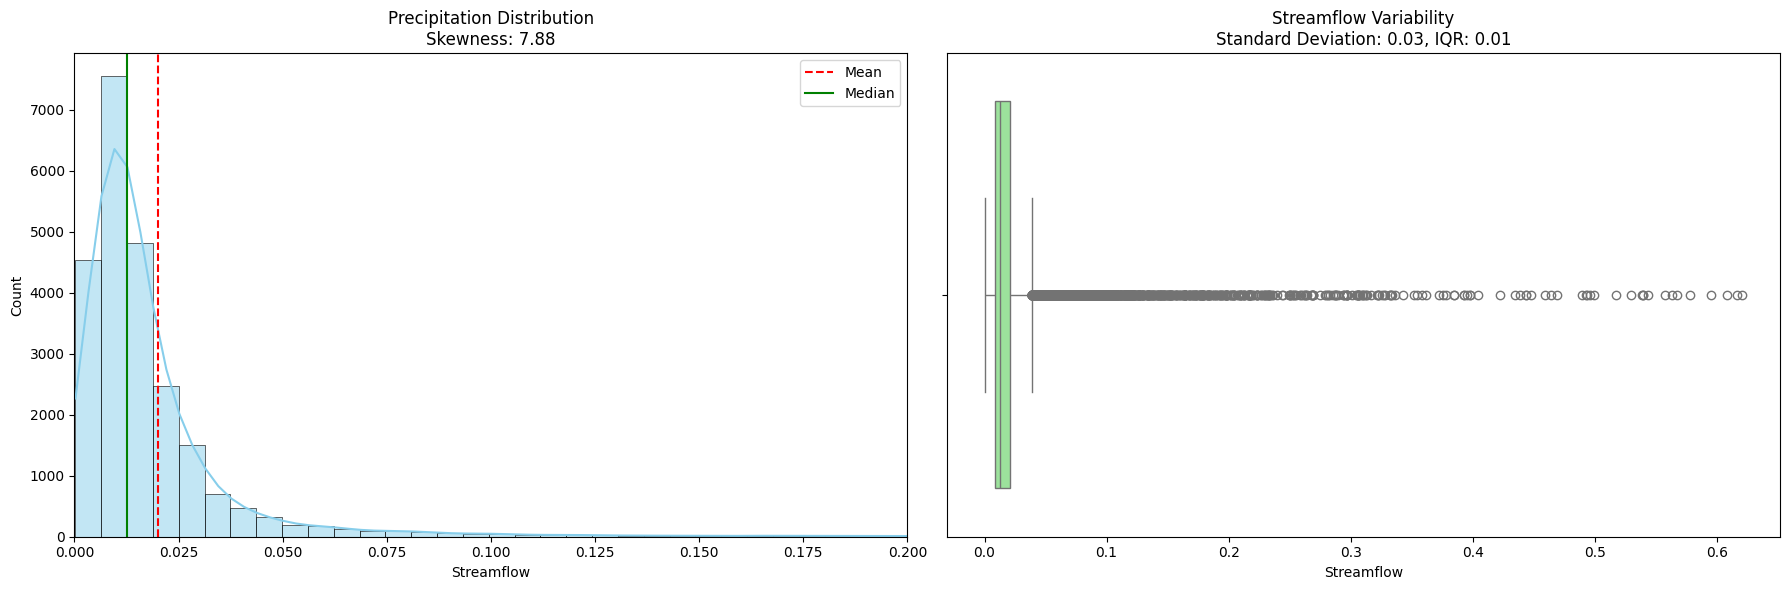

In [6]:
# Measure of Variability (Standard Deviation and IQR)
std_dev = df['Streamflow'].std()
iqr = df['Streamflow'].quantile(0.75) - df['Streamflow'].quantile(0.25)

# Measure of Symmetry (Skewness)
skewness = df['Streamflow'].skew()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Histogram with overlayed KDE to show distribution and skewness
sns.histplot(df['Streamflow'], bins=100, kde=True, ax=ax[0], color='skyblue')
ax[0].set_title(f'Precipitation Distribution\nSkewness: {skewness:.2f}')
ax[0].axvline(df['Streamflow'].mean(), color='red', linestyle='--', label='Mean')
ax[0].axvline(df['Streamflow'].median(), color='green', linestyle='-', label='Median')
ax[0].legend()
ax[0].set_xlim([0, 0.2])

# Boxplot to show variability (IQR) and potential outliers
sns.boxplot(x=df['Streamflow'], ax=ax[1], color='lightgreen')
ax[1].set_title(f'Streamflow Variability\nStandard Deviation: {std_dev:.2f}, IQR: {iqr:.2f}')

plt.tight_layout()
plt.show()

In [ ]:
# Exercise 4 & HW2 #3
# 1) Calcuate qs and compare it with skewness
# 2) Discuss how qs and skewness is different each other

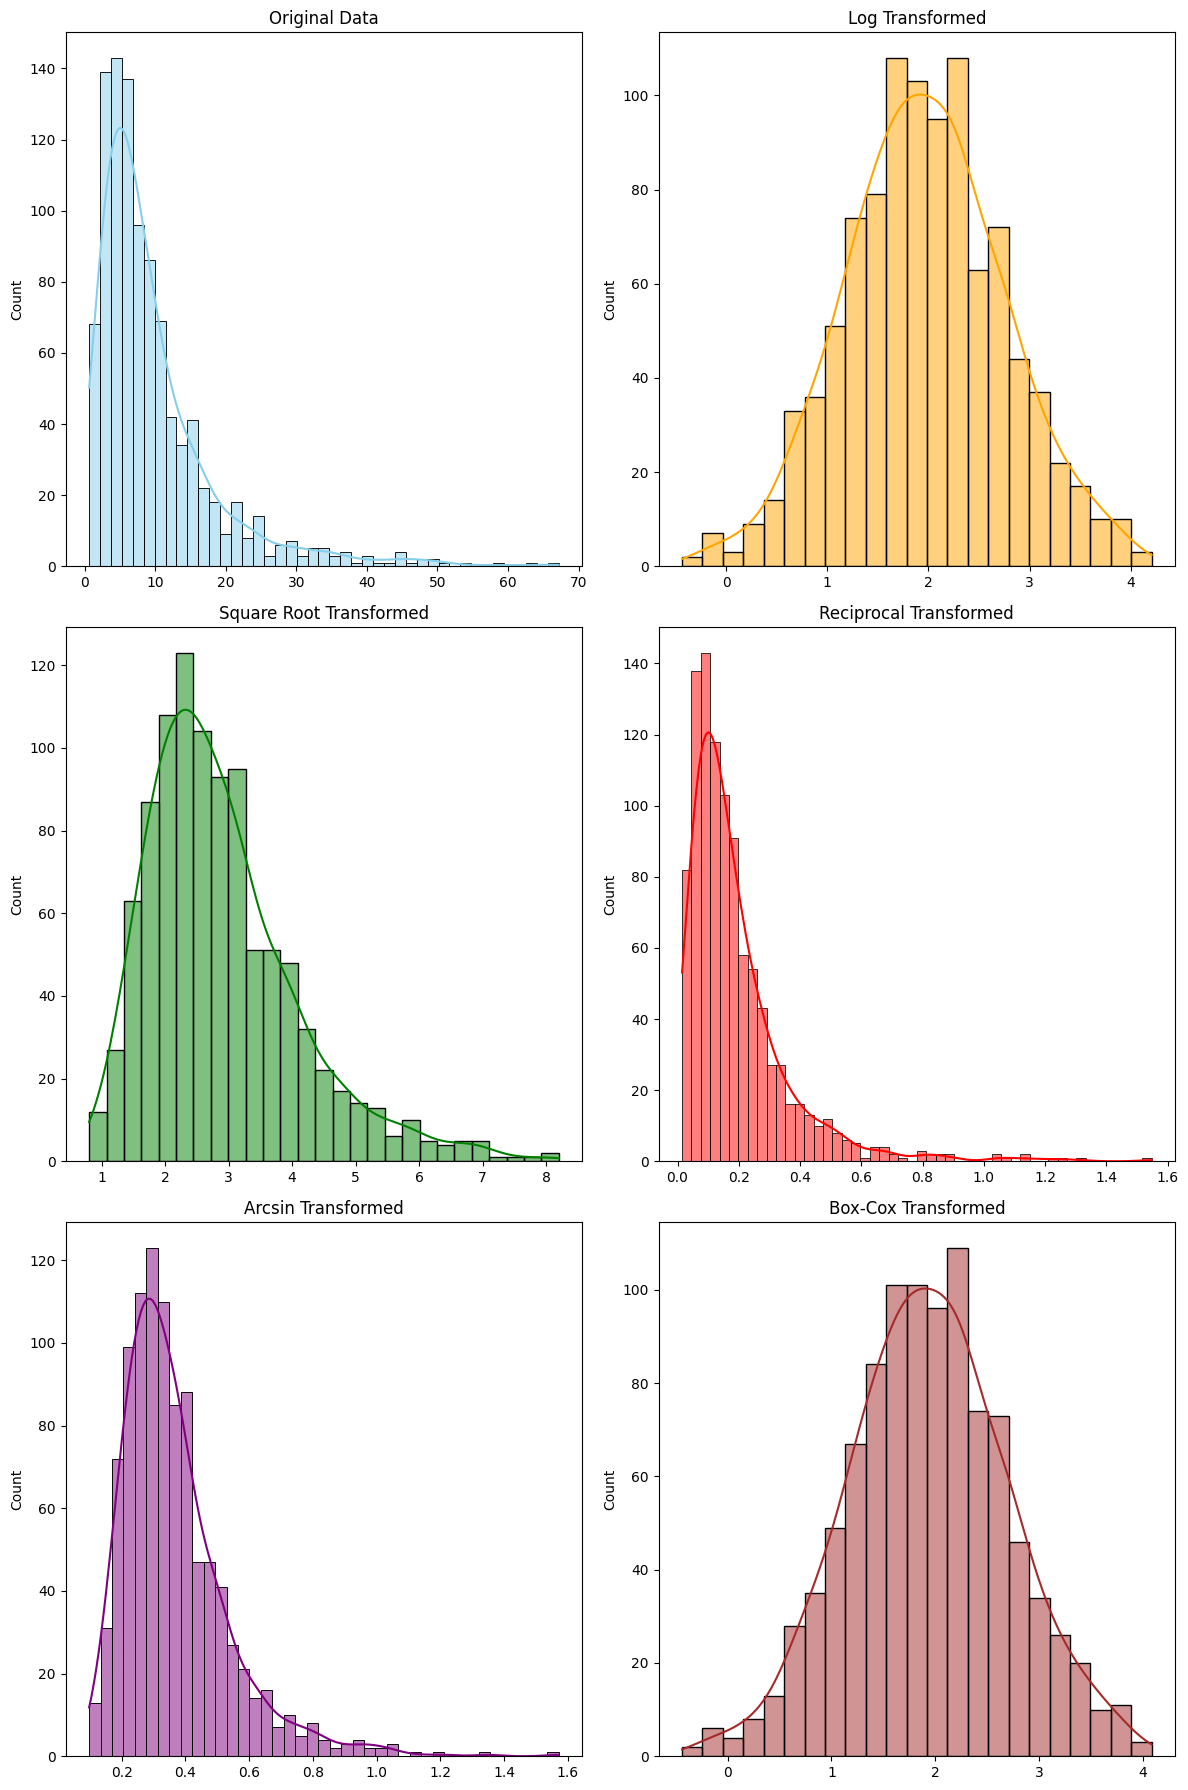

In [9]:
# Generate skewed data
np.random.seed(0)
data = np.random.lognormal(mean=2, sigma=0.8, size=1000)

# Apply transformations
log_data = ?
sqrt_data = ?
reciprocal_data = ?
arcsin_data = np.arcsin(np.sqrt(data / max(data)))
boxcox_data, _ = stats.? #refer https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes = axes.flatten()

sns.histplot(data, kde=True, ax=axes[0], color='skyblue').set_title('Original Data')
sns.histplot(log_data, kde=True, ax=axes[1], color='orange').set_title('Log Transformed')
sns.histplot(sqrt_data, kde=True, ax=axes[2], color='green').set_title('Square Root Transformed')
sns.histplot(reciprocal_data, kde=True, ax=axes[3], color='red').set_title('Reciprocal Transformed')
sns.histplot(arcsin_data, kde=True, ax=axes[4], color='purple').set_title('Arcsin Transformed')
sns.histplot(boxcox_data, kde=True, ax=axes[5], color='brown').set_title('Box-Cox Transformed')

plt.tight_layout()
plt.show()

In [ ]:
# Exercise 5 & HW2 #4
# 1) For the streamflow data we used for HW2 #3, what transformation method would transform this streamflow data to the normal distribution?
# 2) Show the plot results as above.

In [ ]:
# Your code here